In [13]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import geopandas as gpd
from shapely.geometry import Point
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
from sodapy import Socrata
import os
import zipfile
from zipfile import ZipFile
import json
import pylab as pl 
import shapely
from fiona.crs import from_epsg
import urllib
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [14]:
# Enter the information from those sections here
socrata_domain = 'data.cityofnewyork.us' # nyc open data domain
socrata_dataset_identifier = 'erm2-nwe9' # building footprints dataset identifier

# App Tokens can be generated by creating an account at https://opendata.socrata.com/signup
# Tokens are optional (`None` can be used instead), though requests will be rate limited.
#
# If you choose to use a token, run the following command on the terminal (or add it to your .bashrc)
# $ export SODAPY_APPTOKEN=<token>
socrata_token = os.environ.get("APP_TOKEN_311")              

In [15]:
client = Socrata(socrata_domain, socrata_token)
print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

Domain: data.cityofnewyork.us
Session: <requests.sessions.Session object at 0x1a22e06c50>
URI Prefix: https://


In [16]:
client = Socrata(socrata_domain, socrata_token)
results = client.get(socrata_dataset_identifier, limit=15000, q="Social Distancing", select="*")

In [17]:
social_distancing = pd.DataFrame.from_dict(results)
social_distancing.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
0,45969953,2020-04-10T01:37:47.000,2020-04-10T02:22:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10452,1075 GRAND CONCOURSE,...,2024720011,BRONX,1006344,242206,PHONE,Unspecified,BRONX,40.831447302010204,-73.92016162115374,"{'latitude': '40.831447302010204', 'longitude'..."
1,45970911,2020-04-10T00:39:56.000,2020-04-10T06:21:11.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472,1268 MORRISON AVENUE,...,2037780028,BRONX,1018835,242172,ONLINE,Unspecified,BRONX,40.83131390137001,-73.875024651457,"{'latitude': '40.83131390137001', 'longitude':..."
2,45971625,2020-04-10T01:53:01.000,2020-04-10T06:06:28.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10453,1820 PHELAN PLACE,...,2028790075,BRONX,1007254,249976,PHONE,Unspecified,BRONX,40.852771349060866,-73.91684661455994,"{'latitude': '40.852771349060866', 'longitude'..."
3,45973105,2020-04-09T23:54:17.000,2020-04-10T03:14:02.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472,1268 MORRISON AVENUE,...,2037780028,BRONX,1018835,242172,ONLINE,Unspecified,BRONX,40.83131390137001,-73.875024651457,"{'latitude': '40.83131390137001', 'longitude':..."
4,45973134,2020-04-10T00:57:17.000,2020-04-10T03:13:32.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472,1268 MORRISON AVENUE,...,2037780028,BRONX,1018835,242172,ONLINE,Unspecified,BRONX,40.83131390137001,-73.875024651457,"{'latitude': '40.83131390137001', 'longitude':..."


In [18]:
social_distancing.shape

(13385, 31)

In [19]:
social_distancing.descriptor.value_counts()

Social Distancing    13385
Name: descriptor, dtype: int64

In [20]:
social_distancing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13385 entries, 0 to 13384
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   unique_key                      13385 non-null  object
 1   created_date                    13385 non-null  object
 2   closed_date                     13371 non-null  object
 3   agency                          13385 non-null  object
 4   agency_name                     13385 non-null  object
 5   complaint_type                  13385 non-null  object
 6   descriptor                      13385 non-null  object
 7   location_type                   10885 non-null  object
 8   incident_zip                    13384 non-null  object
 9   incident_address                13384 non-null  object
 10  street_name                     13384 non-null  object
 11  cross_street_1                  13371 non-null  object
 12  cross_street_2                  13374 non-null

In [21]:
social_distancing.iloc[:,:15].head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2
0,45969953,2020-04-10T01:37:47.000,2020-04-10T02:22:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10452,1075 GRAND CONCOURSE,GRAND CONCOURSE,EAST 165 STREET,EAST 166 STREET,EAST 165 STREET,EAST 166 STREET
1,45970911,2020-04-10T00:39:56.000,2020-04-10T06:21:11.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472,1268 MORRISON AVENUE,MORRISON AVENUE,WESTCHESTER AVENUE,EAST 172 STREET,WESTCHESTER AVENUE,EAST 172 STREET
2,45971625,2020-04-10T01:53:01.000,2020-04-10T06:06:28.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10453,1820 PHELAN PLACE,PHELAN PLACE,WEST TREMONT AVENUE,BILLINGSLEY TERRACE,WEST TREMONT AVENUE,BILLINGSLEY TERRACE
3,45973105,2020-04-09T23:54:17.000,2020-04-10T03:14:02.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472,1268 MORRISON AVENUE,MORRISON AVENUE,WESTCHESTER AVENUE,EAST 172 STREET,WESTCHESTER AVENUE,EAST 172 STREET
4,45973134,2020-04-10T00:57:17.000,2020-04-10T03:13:32.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472,1268 MORRISON AVENUE,MORRISON AVENUE,WESTCHESTER AVENUE,EAST 172 STREET,WESTCHESTER AVENUE,EAST 172 STREET


In [22]:
social_distancing.iloc[:,15:30].head()

,city,landmark,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude
0,BRONX,GRAND CONCOURSE,Closed,The Police Department responded to the complai...,2020-04-10T06:22:50.000,04 BRONX,2024720011,BRONX,1006344,242206,PHONE,Unspecified,BRONX,40.831447302010204,-73.92016162115374
1,BRONX,MORRISON AVENUE,Closed,The Police Department issued a summons in resp...,2020-04-10T10:21:15.000,09 BRONX,2037780028,BRONX,1018835,242172,ONLINE,Unspecified,BRONX,40.83131390137001,-73.875024651457
2,BRONX,PHELAN PLACE,Closed,The Police Department responded and upon arriv...,2020-04-10T10:06:35.000,05 BRONX,2028790075,BRONX,1007254,249976,PHONE,Unspecified,BRONX,40.852771349060866,-73.91684661455994
3,BRONX,MORRISON AVENUE,Closed,The Police Department issued a summons in resp...,2020-04-10T07:14:08.000,09 BRONX,2037780028,BRONX,1018835,242172,ONLINE,Unspecified,BRONX,40.83131390137001,-73.875024651457
4,BRONX,MORRISON AVENUE,Closed,The Police Department issued a summons in resp...,2020-04-10T07:13:36.000,09 BRONX,2037780028,BRONX,1018835,242172,ONLINE,Unspecified,BRONX,40.83131390137001,-73.875024651457


In [23]:
social_distancing.to_csv('data/social-distancing-311', index=False)

In [24]:
social_distancing = pd.read_csv('data/social-distancing-311')

In [25]:
social_distancing.shape

(13385, 31)

In [26]:
social_distancing.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
0,45969953,2020-04-10T01:37:47.000,2020-04-10T02:22:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10452.0,1075 GRAND CONCOURSE,...,2.024720e+09,BRONX,1006344.0,242206.0,PHONE,Unspecified,BRONX,40.831447,-73.920162,"{'latitude': '40.831447302010204', 'longitude'..."
1,45970911,2020-04-10T00:39:56.000,2020-04-10T06:21:11.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,2.037780e+09,BRONX,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':..."
2,45971625,2020-04-10T01:53:01.000,2020-04-10T06:06:28.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10453.0,1820 PHELAN PLACE,...,2.028790e+09,BRONX,1007254.0,249976.0,PHONE,Unspecified,BRONX,40.852771,-73.916847,"{'latitude': '40.852771349060866', 'longitude'..."
3,45973105,2020-04-09T23:54:17.000,2020-04-10T03:14:02.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,2.037780e+09,BRONX,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':..."
4,45973134,2020-04-10T00:57:17.000,2020-04-10T03:13:32.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,2.037780e+09,BRONX,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':..."


In [27]:
social_distancing.describe()

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude
count,1.338500e+04,13384.000000,1.124500e+04,1.321600e+04,13216.000000,13216.000000,13216.000000
mean,4.596532e+07,10790.445084,2.677478e+09,1.002621e+06,205442.851544,40.730526,-73.933678
std,3.024741e+04,555.409889,1.189884e+09,2.076570e+04,29938.800329,0.082173,0.074899
min,4.590831e+07,83.000000,0.000000e+00,9.135340e+05,121548.000000,40.500049,-74.254298
25%,4.594046e+07,10302.000000,2.023740e+09,9.909888e+05,183524.000000,40.670321,-73.975710
50%,4.596348e+07,11201.000000,3.018650e+09,1.000454e+06,203863.000000,40.726190,-73.941526
75%,4.598992e+07,11229.000000,4.000160e+09,1.013790e+06,229433.000000,40.796403,-73.893286
max,4.601964e+07,11694.000000,5.080260e+09,1.067099e+06,270354.000000,40.908692,-73.701015


In [28]:
social_distancing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13385 entries, 0 to 13384
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      13385 non-null  int64  
 1   created_date                    13385 non-null  object 
 2   closed_date                     13371 non-null  object 
 3   agency                          13385 non-null  object 
 4   agency_name                     13385 non-null  object 
 5   complaint_type                  13385 non-null  object 
 6   descriptor                      13385 non-null  object 
 7   location_type                   10885 non-null  object 
 8   incident_zip                    13384 non-null  float64
 9   incident_address                13384 non-null  object 
 10  street_name                     13384 non-null  object 
 11  cross_street_1                  13371 non-null  object 
 12  cross_street_2                  

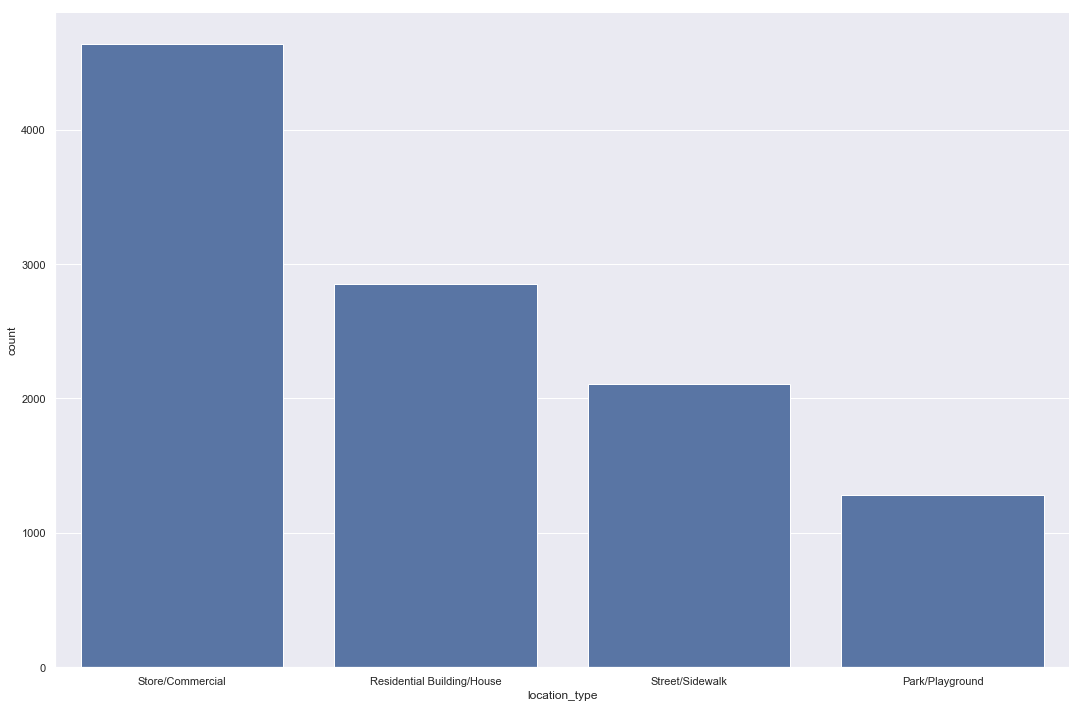

In [29]:
idx = social_distancing.groupby('location_type')['unique_key'].count().sort_values(ascending=False)
idx = idx.index
order = idx.tolist()

sns.catplot(x="location_type", kind="count", data = social_distancing, color="C0",
            height = 10, aspect = 1.5, order=order)

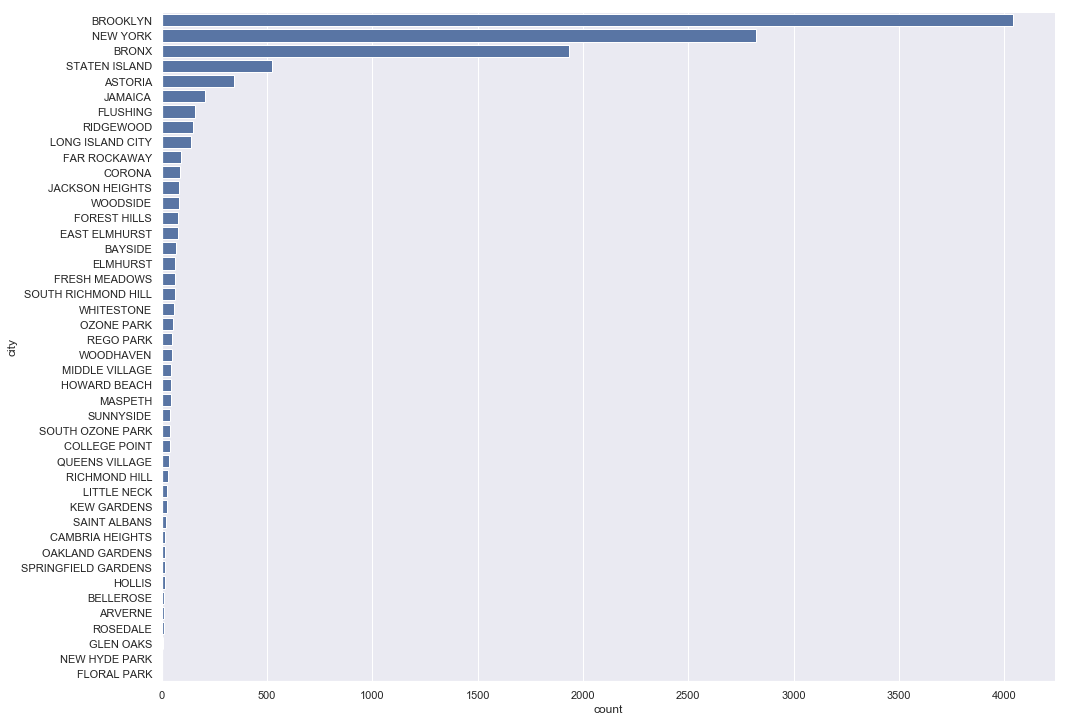

In [30]:
idx = social_distancing.groupby('city')['unique_key'].count().sort_values(ascending=False)
idx = idx.index
order = idx.tolist()

sns.catplot(y="city", kind="count", data = social_distancing, color="C0",
            height = 10, aspect = 1.5, order=order)

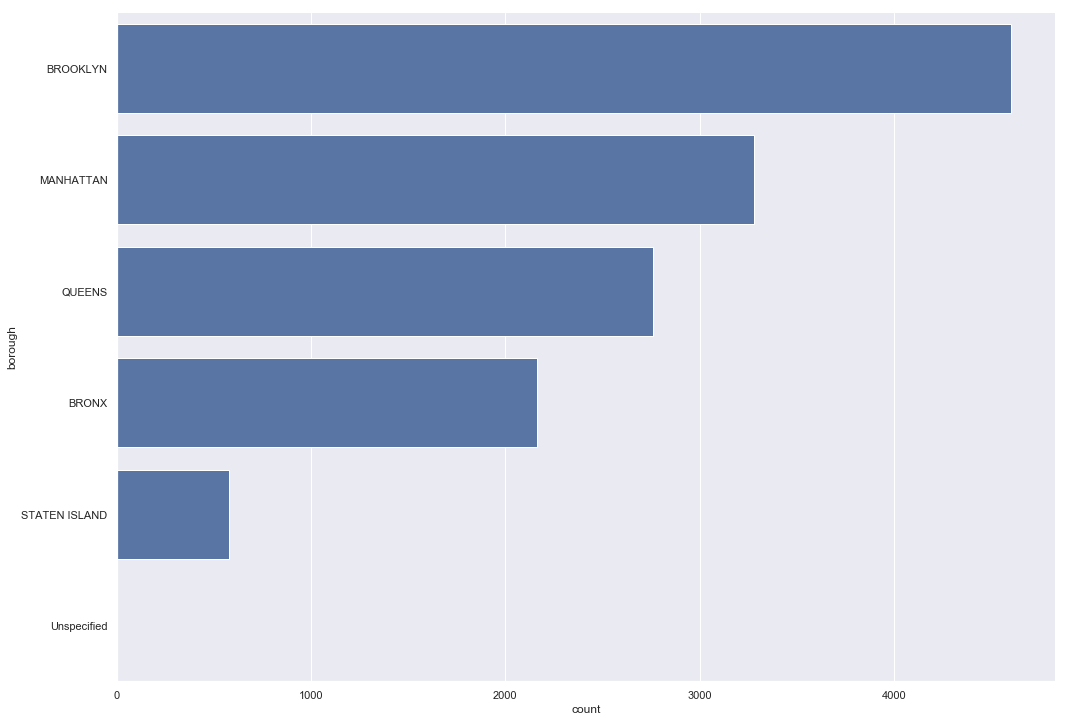

In [31]:
idx = social_distancing.groupby('borough')['unique_key'].count().sort_values(ascending=False)
idx = idx.index
order = idx.tolist()

sns.catplot(y="borough", kind="count", data = social_distancing, color="C0",
            height = 10, aspect = 1.5, order=order)

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


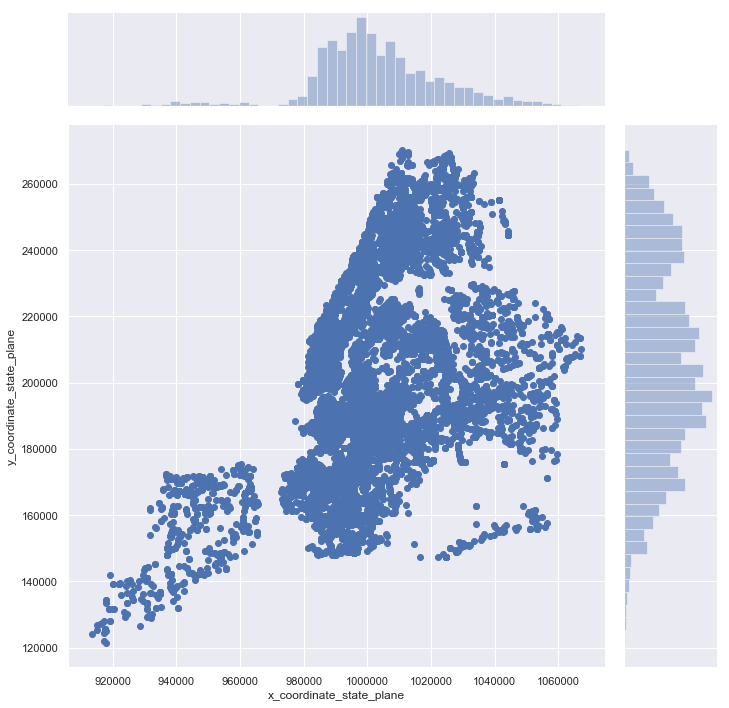

In [32]:
sns.jointplot(x="x_coordinate_state_plane", y="y_coordinate_state_plane", 
              height = 10, data=social_distancing)

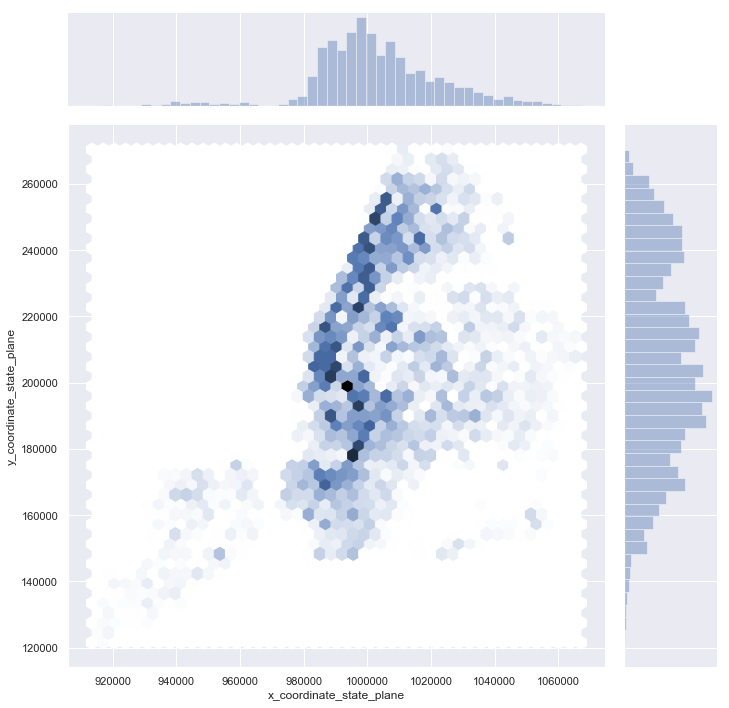

In [33]:
sns.jointplot(x="x_coordinate_state_plane", y="y_coordinate_state_plane", 
              kind = 'hex', height = 10, data=social_distancing)

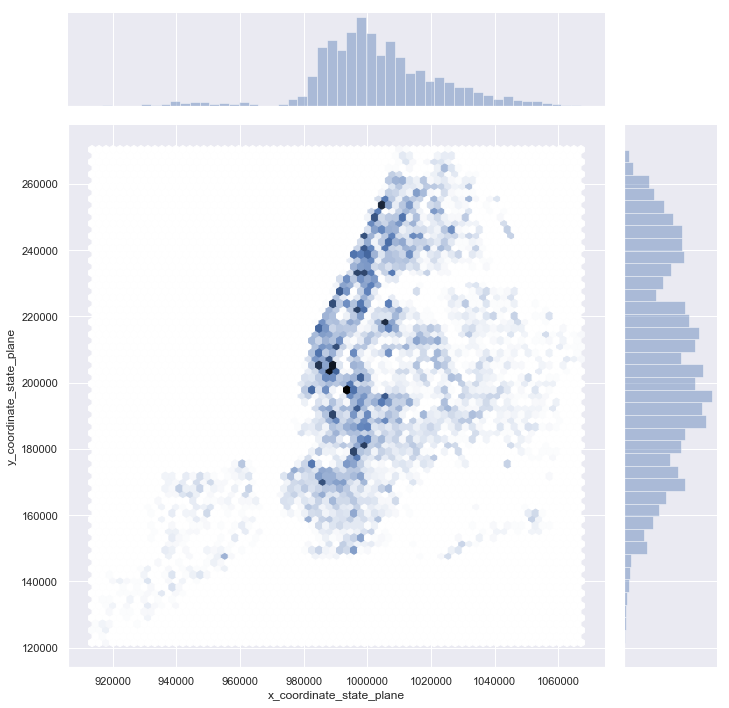

In [34]:
sns.jointplot(x="x_coordinate_state_plane", y="y_coordinate_state_plane", 
              kind = 'hex', height = 10, data=social_distancing, 
              joint_kws = dict(gridsize=70))

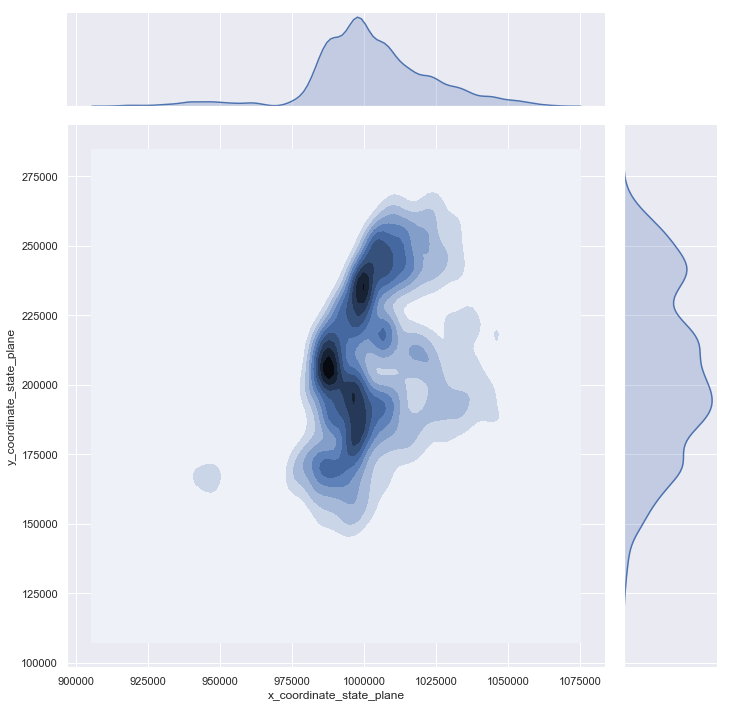

In [35]:
sns.jointplot(x="x_coordinate_state_plane", y="y_coordinate_state_plane", 
              kind = 'kde', height = 10, data=social_distancing)

/Users/geribauer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


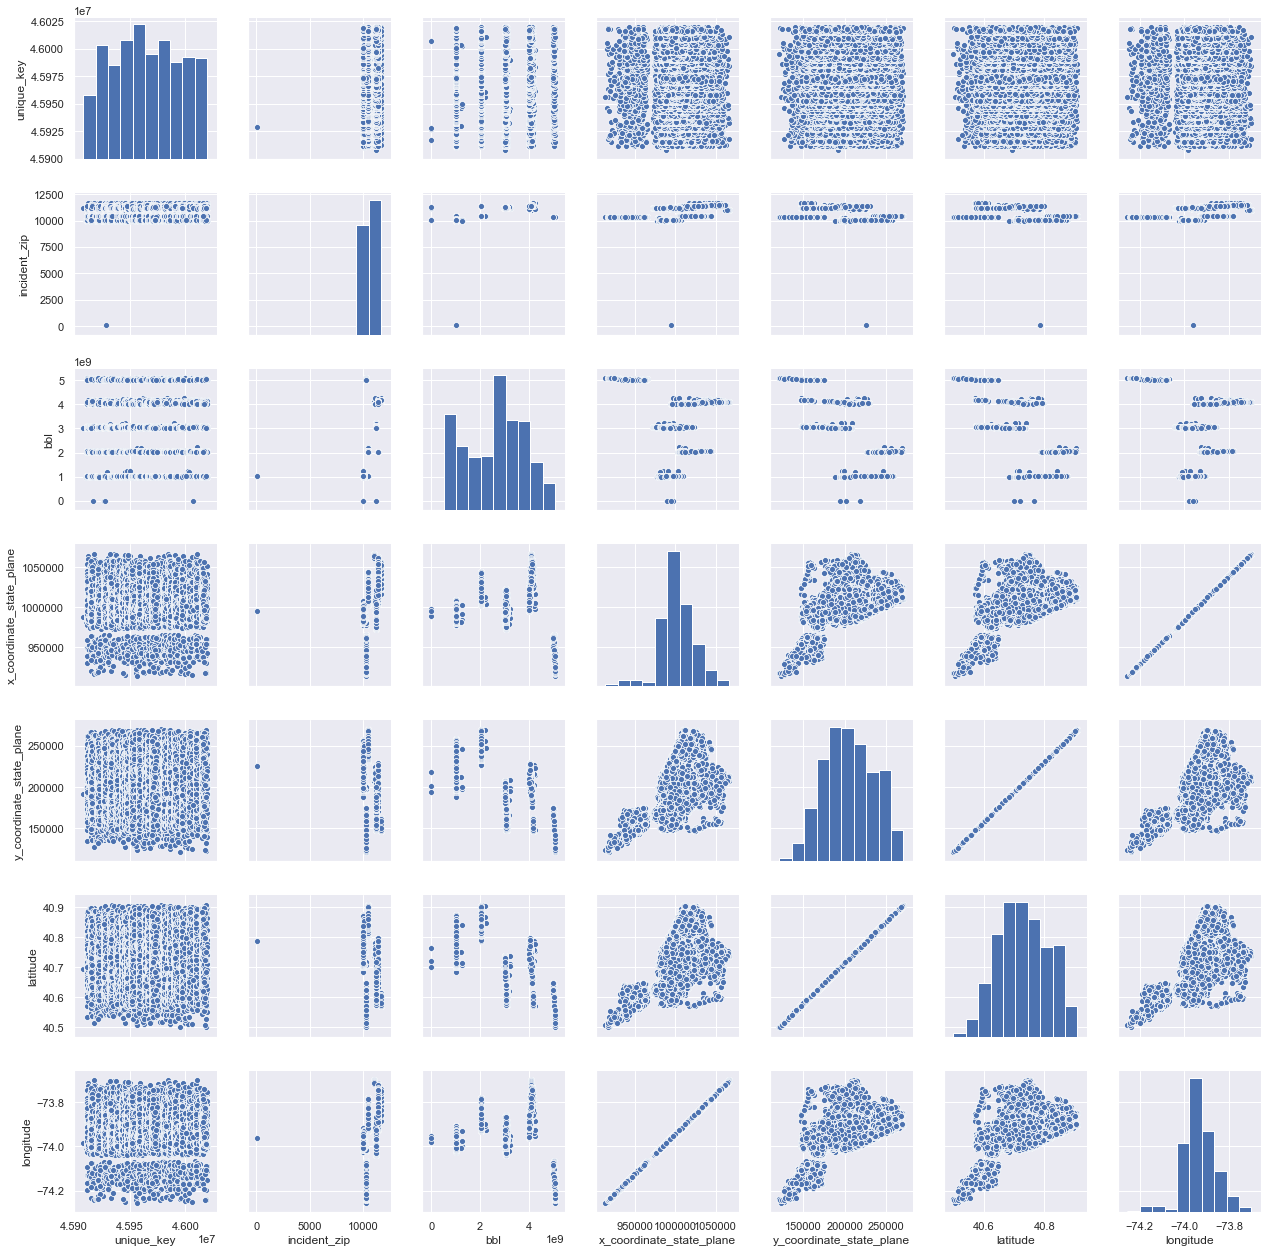

In [36]:
sns.pairplot(social_distancing)

In [37]:
# sns.pairplot(social_distancing, hue='borough')

In [38]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(social_distancing['x_coordinate_state_plane'], social_distancing['y_coordinate_state_plane'])]

In [39]:
# Creating a Geographic data frame 

crs = {'init': 'epsg:2263'}

gdf = gpd.GeoDataFrame(social_distancing, crs=crs, geometry=geometry)

In [40]:
social_distancing

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,geometry
0,45969953,2020-04-10T01:37:47.000,2020-04-10T02:22:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10452.0,1075 GRAND CONCOURSE,...,BRONX,1006344.0,242206.0,PHONE,Unspecified,BRONX,40.831447,-73.920162,"{'latitude': '40.831447302010204', 'longitude'...",POINT (1006344 242206)
1,45970911,2020-04-10T00:39:56.000,2020-04-10T06:21:11.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,BRONX,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':...",POINT (1018835 242172)
2,45971625,2020-04-10T01:53:01.000,2020-04-10T06:06:28.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10453.0,1820 PHELAN PLACE,...,BRONX,1007254.0,249976.0,PHONE,Unspecified,BRONX,40.852771,-73.916847,"{'latitude': '40.852771349060866', 'longitude'...",POINT (1007254 249976)
3,45973105,2020-04-09T23:54:17.000,2020-04-10T03:14:02.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,BRONX,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':...",POINT (1018835 242172)
4,45973134,2020-04-10T00:57:17.000,2020-04-10T03:13:32.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,BRONX,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':...",POINT (1018835 242172)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13380,45973527,2020-04-09T20:02:15.000,2020-04-09T20:15:08.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Street/Sidewalk,10304.0,215 BROAD STREET,...,STATEN ISLAND,961597.0,166615.0,ONLINE,Unspecified,STATEN ISLAND,40.623967,-74.081604,"{'latitude': '40.623967219444296', 'longitude'...",POINT (961597 166615)
13381,45973854,2020-04-09T10:22:15.000,2020-04-09T11:49:51.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,11213.0,1535 STERLING PLACE,...,BROOKLYN,1004307.0,183860.0,PHONE,Unspecified,BROOKLYN,40.671307,-73.927697,"{'latitude': '40.67130725318745', 'longitude':...",POINT (1004307 183860)
13382,45972386,2020-04-09T16:53:40.000,2020-04-09T17:47:44.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,11238.0,69 GATES AVENUE,...,BROOKLYN,993749.0,188652.0,PHONE,Unspecified,BROOKLYN,40.684478,-73.965750,"{'latitude': '40.68447783282449', 'longitude':...",POINT (993749 188652)
13383,45972372,2020-04-09T09:20:57.000,2020-04-09T11:17:38.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10028.0,240 EAST 86 STREET,...,MANHATTAN,997263.0,222873.0,ONLINE,Unspecified,MANHATTAN,40.778402,-73.953014,"{'latitude': '40.77840159574453', 'longitude':...",POINT (997263 222873)


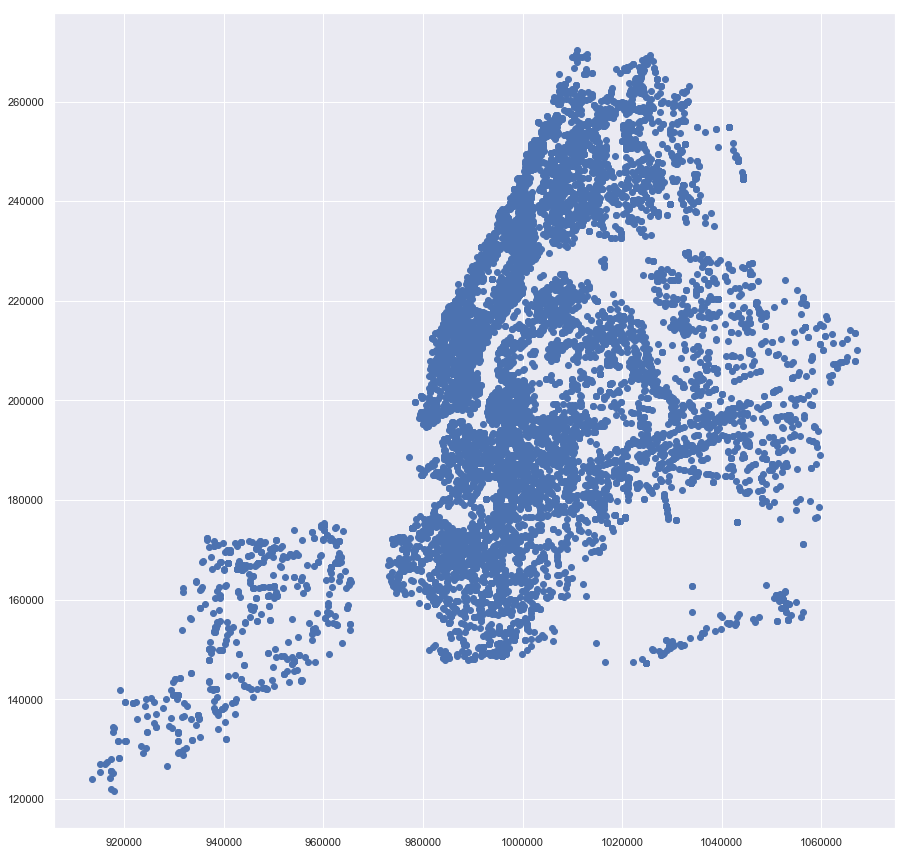

In [41]:
fig, ax = plt.subplots(figsize=(20,15))

gdf.plot(ax=ax)

In [42]:
pie = social_distancing.groupby('borough')['unique_key'].count()
pie.rename("count", inplace=True)
pie.sort_values(ascending=False, inplace=True)
pie

borough
BROOKLYN         4602
MANHATTAN        3279
QUEENS           2763
BRONX            2163
STATEN ISLAND     576
Unspecified         2
Name: count, dtype: int64

Text(0.1, 0.01, 'Figure 36: A pie chart displaying the % of total buildings and count by borough.')

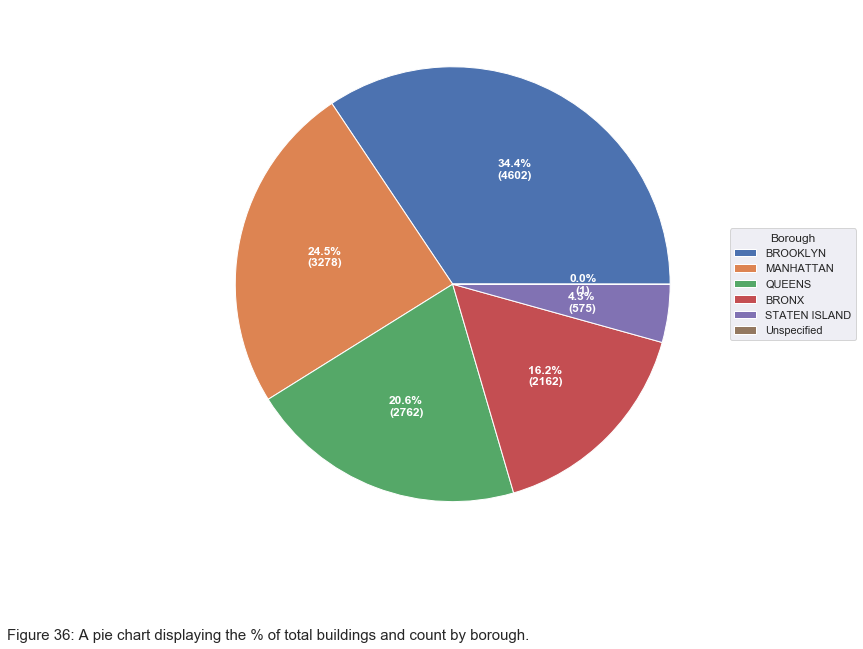

In [43]:
txt = "Figure 36: A pie chart displaying the % of total buildings and count by borough."

fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(pie, autopct=lambda pct: func(pct, pie),
                                  textprops=dict(color="w"))

ax.legend(wedges, pie.index,
          title="Borough",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) 

plt.setp(autotexts, size=12, weight="bold")
plt.figtext(0.10, 0.01, txt, wrap=True, horizontalalignment='left', fontsize=15)

In [44]:
social_distancing.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,geometry
0,45969953,2020-04-10T01:37:47.000,2020-04-10T02:22:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10452.0,1075 GRAND CONCOURSE,...,BRONX,1006344.0,242206.0,PHONE,Unspecified,BRONX,40.831447,-73.920162,"{'latitude': '40.831447302010204', 'longitude'...",POINT (1006344 242206)
1,45970911,2020-04-10T00:39:56.000,2020-04-10T06:21:11.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,BRONX,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':...",POINT (1018835 242172)
2,45971625,2020-04-10T01:53:01.000,2020-04-10T06:06:28.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10453.0,1820 PHELAN PLACE,...,BRONX,1007254.0,249976.0,PHONE,Unspecified,BRONX,40.852771,-73.916847,"{'latitude': '40.852771349060866', 'longitude'...",POINT (1007254 249976)
3,45973105,2020-04-09T23:54:17.000,2020-04-10T03:14:02.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,BRONX,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':...",POINT (1018835 242172)
4,45973134,2020-04-10T00:57:17.000,2020-04-10T03:13:32.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,BRONX,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':...",POINT (1018835 242172)


In [45]:
# transforming our 'Year' index to datetime
social_distancing.created_date = pd.to_datetime(social_distancing.created_date, infer_datetime_format=True)

social_distancing.dtypes

unique_key                                 int64
created_date                      datetime64[ns]
closed_date                               object
agency                                    object
agency_name                               object
complaint_type                            object
descriptor                                object
location_type                             object
incident_zip                             float64
incident_address                          object
street_name                               object
cross_street_1                            object
cross_street_2                            object
intersection_street_1                     object
intersection_street_2                     object
city                                      object
landmark                                  object
status                                    object
resolution_description                    object
resolution_action_updated_date            object
community_board     

In [46]:
social_distancing['NewDate'] = social_distancing.created_date.dt.strftime("%Y-%m-%d")

In [47]:
social_distancing.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,geometry,NewDate
0,45969953,2020-04-10 01:37:47,2020-04-10T02:22:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10452.0,1075 GRAND CONCOURSE,...,1006344.0,242206.0,PHONE,Unspecified,BRONX,40.831447,-73.920162,"{'latitude': '40.831447302010204', 'longitude'...",POINT (1006344 242206),2020-04-10
1,45970911,2020-04-10 00:39:56,2020-04-10T06:21:11.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':...",POINT (1018835 242172),2020-04-10
2,45971625,2020-04-10 01:53:01,2020-04-10T06:06:28.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10453.0,1820 PHELAN PLACE,...,1007254.0,249976.0,PHONE,Unspecified,BRONX,40.852771,-73.916847,"{'latitude': '40.852771349060866', 'longitude'...",POINT (1007254 249976),2020-04-10
3,45973105,2020-04-09 23:54:17,2020-04-10T03:14:02.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':...",POINT (1018835 242172),2020-04-09
4,45973134,2020-04-10 00:57:17,2020-04-10T03:13:32.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10472.0,1268 MORRISON AVENUE,...,1018835.0,242172.0,ONLINE,Unspecified,BRONX,40.831314,-73.875025,"{'latitude': '40.83131390137001', 'longitude':...",POINT (1018835 242172),2020-04-10


In [48]:
g = social_distancing.groupby('NewDate')['unique_key'].count().reset_index()

g.rename({'unique_key': 'count'}, axis=1, inplace=True)

In [49]:
g.head(20)

,NewDate,count
0,2020-03-28,2
1,2020-03-29,262
2,2020-03-30,776
3,2020-03-31,682
4,2020-04-01,792
5,2020-04-02,607
6,2020-04-03,436
7,2020-04-04,694
8,2020-04-05,599
9,2020-04-06,963


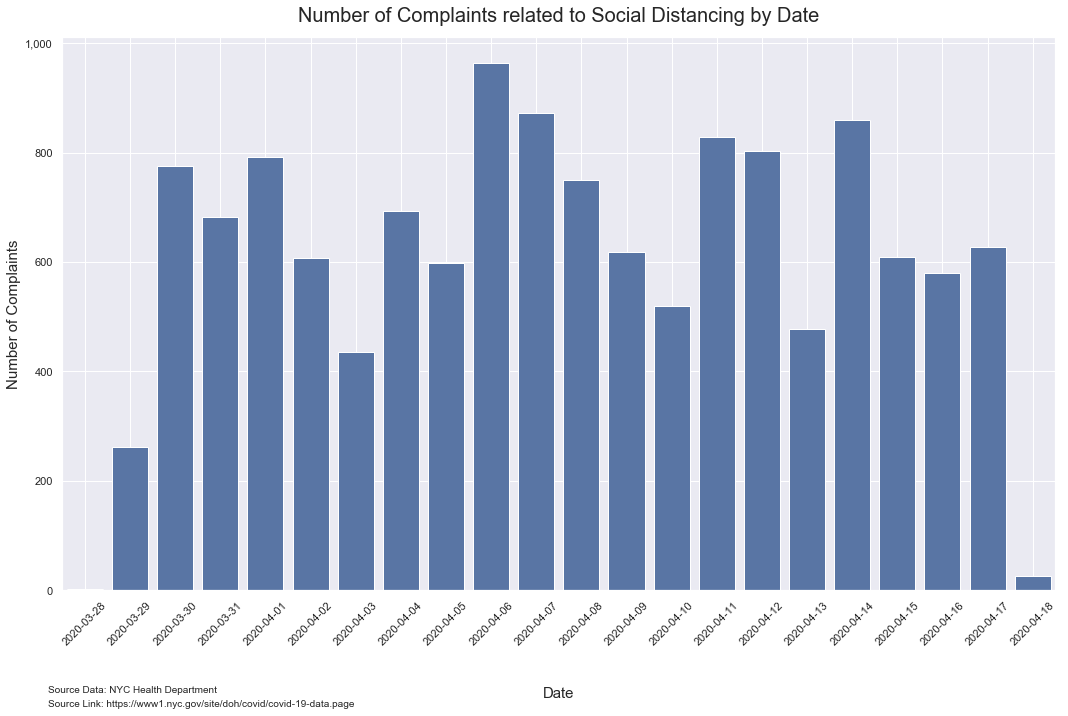

In [50]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')

sns.barplot(x="NewDate", 
            y="count",
            color="C0",
            data=g)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=45)

#ax1.legend_.remove()
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Complaints', fontsize=15)
plt.title('Number of Complaints related to Social Distancing by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()

In [51]:
borough = social_distancing.groupby(['borough', 'NewDate'])['unique_key'].count().reset_index()

In [52]:
borough.rename({'unique_key': 'count'}, axis=1, inplace=True)

In [53]:
borough.head()

,borough,NewDate,count
0,BRONX,2020-03-29,37
1,BRONX,2020-03-30,86
2,BRONX,2020-03-31,98
3,BRONX,2020-04-01,106
4,BRONX,2020-04-02,91


In [54]:
borough.sort_values(by='NewDate', inplace=True)

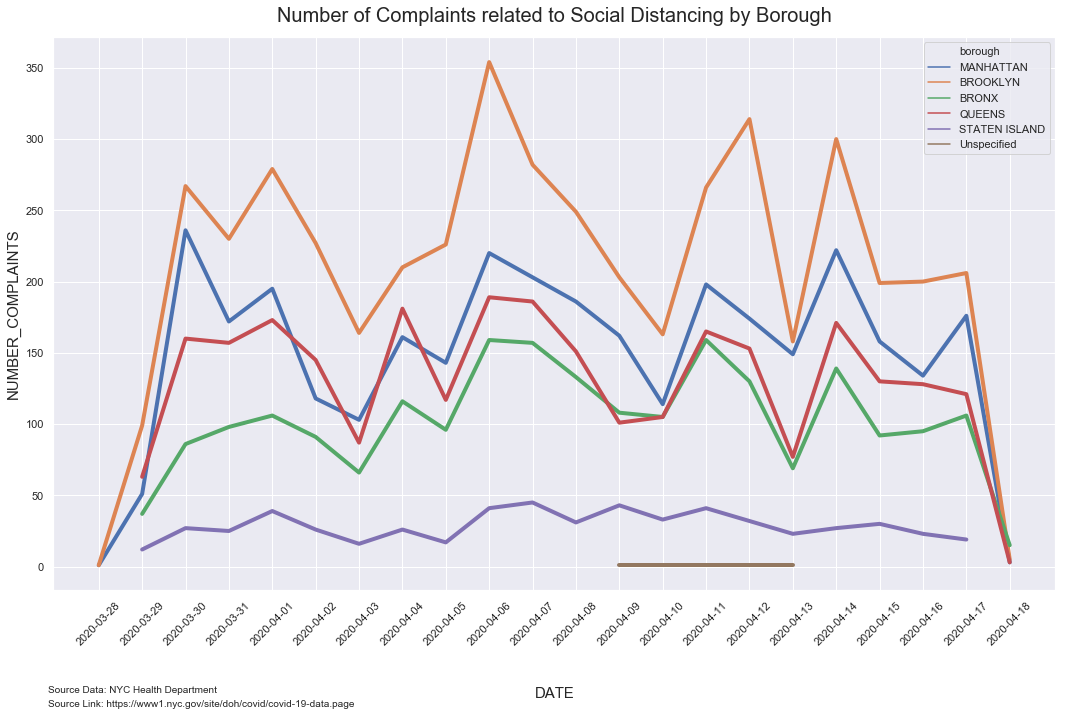

In [55]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')

sns.lineplot(x="NewDate", 
            y="count",
            hue="borough",
            data=borough,
            linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=45)

#ax1.legend_.remove()
ax1.set_xlabel('DATE', fontsize=15)
ax1.set_ylabel('NUMBER_COMPLAINTS', fontsize=15)
plt.title('Number of Complaints related to Social Distancing by Borough', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()